In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates
import requests
import json
from pathlib import Path
import time
import datetime

In [2]:
%matplotlib inline

In [34]:
#path to files
#file_path_json = Path('C:\\Users\\corma\\comp30830\\new_realtime_bike_data(24_2_23).json')
file_path_csv = Path('C:\\Users\\corma\\Desktop\\Software Eng\\dublinbikes_20211001_20220101_usage.csv')


In [35]:
df = pd.read_csv(file_path_csv)

In [36]:
df.shape

(2776085, 11)

In [37]:
#dfcsv.info
df.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2,2021-10-01 00:05:02,2021-10-01 00:00:15,BLESSINGTON STREET,20,7,13,Open,Blessington Street,53.35677,-6.26814
1,2,2021-10-01 00:10:02,2021-10-01 00:05:36,BLESSINGTON STREET,20,6,14,Open,Blessington Street,53.35677,-6.26814
2,2,2021-10-01 00:15:02,2021-10-01 00:05:36,BLESSINGTON STREET,20,6,14,Open,Blessington Street,53.35677,-6.26814
3,2,2021-10-01 00:20:02,2021-10-01 00:15:43,BLESSINGTON STREET,20,6,14,Open,Blessington Street,53.35677,-6.26814
4,2,2021-10-01 00:25:02,2021-10-01 00:15:43,BLESSINGTON STREET,20,6,14,Open,Blessington Street,53.35677,-6.26814


In [38]:
#df.dtypes

In [180]:
df["TIME"] = pd.to_datetime(df["TIME"])
df["TIME"].head()

0   2021-10-01 00:05:02
1   2021-10-01 00:10:02
2   2021-10-01 00:15:02
3   2021-10-01 00:20:02
4   2021-10-01 00:25:02
Name: TIME, dtype: datetime64[ns]

In [181]:
#df.dtypes

In [308]:
df["DAY_num"] = df["TIME"].dt.day
df["DAY_num"].tail()

2776080    1
2776081    1
2776082    1
2776083    1
2776084    1
Name: DAY_num, dtype: int64

In [309]:
df.loc[df['DAY_num'] == 1, 'DAY'] = 'Mon'  
df.loc[df['DAY_num'] == 2, 'DAY'] = 'Tue'  
df.loc[df['DAY_num'] == 3, 'DAY'] = 'Wed'  
df.loc[df['DAY_num'] == 4, 'DAY'] = 'Thu'  
df.loc[df['DAY_num'] == 5, 'DAY'] = 'Fri' 
df.loc[df['DAY_num'] == 6, 'DAY'] = 'Sat' 
df.loc[df['DAY_num'] == 7, 'DAY'] = 'Sun' 
#df['DAY'].head(15)
df['DAY'].tail(15)

2776070    Mon
2776071    Mon
2776072    Mon
2776073    Mon
2776074    Mon
2776075    Mon
2776076    Mon
2776077    Mon
2776078    Mon
2776079    Mon
2776080    Mon
2776081    Mon
2776082    Mon
2776083    Mon
2776084    Mon
Name: DAY, dtype: object

In [310]:
#df.dtypes

In [311]:
df["YEAR"] = df["TIME"].dt.year
#df["YEAR"].head()

In [312]:
df["HOUR"] = df["TIME"].dt.hour
df["HOUR"].tail()

2776080    23
2776081    23
2776082    23
2776083    23
2776084    23
Name: HOUR, dtype: int64

In [412]:
df["MONTH"] = df["TIME"].dt.month
df["MONTH"].unique()

array([10, 11, 12,  1], dtype=int64)

In [314]:
df["MINUTE"] = df["TIME"].dt.minute
df["MINUTE"].tail(15)

2776070    45
2776071    50
2776072    55
2776073     0
2776074     5
2776075    10
2776076    15
2776077    20
2776078    25
2776079    30
2776080    35
2776081    40
2776082    45
2776083    50
2776084    55
Name: MINUTE, dtype: int64

In [315]:
df.dtypes

STATION ID                        int64
TIME                     datetime64[ns]
LAST UPDATED                     object
NAME                             object
BIKE STANDS                       int64
AVAILABLE BIKE STANDS             int64
AVAILABLE BIKES                   int64
STATUS                           object
ADDRESS                          object
LATITUDE                        float64
LONGITUDE                       float64
DAY_num                           int64
DAY                              object
YEAR                              int64
HOUR                              int64
MINUTE                            int64
MONTH                             int64
hmj                             float64
hmja                            float64
station_select                     bool
xplot                           float64
dtype: object

In [401]:
print(df['DAY'][df['DAY']=='Sat'].value_counts().head())
print(df['YEAR'][df['YEAR']==2022].value_counts().head())

Sat    95328
Name: DAY, dtype: int64
2022    31968
Name: YEAR, dtype: int64


In [402]:
def convert_day(num):
    if num == 1:
        return 'Monday'
    elif num == 2:
        return 'Tuesday'
    elif num == 3:
        return 'Wednesday'
    elif num == 4:
        return 'Thursday'
    elif num == 5:
        return 'Friday'
    elif num == 6:
        return 'Saturday'
    else:
        return 'Sunday'

In [403]:
def convert_month(num):
    if num == 1:
        return 'January'
    elif num == 2:
        return 'February'
    elif num == 3:
        return 'March'
    elif num == 4:
        return 'April'
    elif num == 5:
        return 'May'
    elif num == 6:
        return 'June'
    elif num == 7:
        return 'July'
    elif num == 8:
        return 'August'
    elif num == 9:
        return 'September'
    elif num == 10:
        return 'October'
    elif num == 11:
        return 'November'
    else:
        return 'December'

In [418]:
#Input  Search Parameters
day_num = 5
month_num = 10

stationid = 2
stationname = df.loc[(df['STATION ID']==stationid),'NAME'].values[0]

#Screen data based on certain input parameters
df['station_select'] = (df['YEAR']==2021) & (df['MONTH']==month_num) & (df['DAY_num']==day_num) & (df['MINUTE']==0) & (df['STATION ID']==stationid)

x =df['HOUR'].loc[df['station_select']]

In [419]:
df['MINUTE'].unique()

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,  0, 27], dtype=int64)

In [420]:
#y = df['AVAILABLE BIKES'][df['station_select']]
y = df['AVAILABLE BIKES'].loc[df['station_select']]

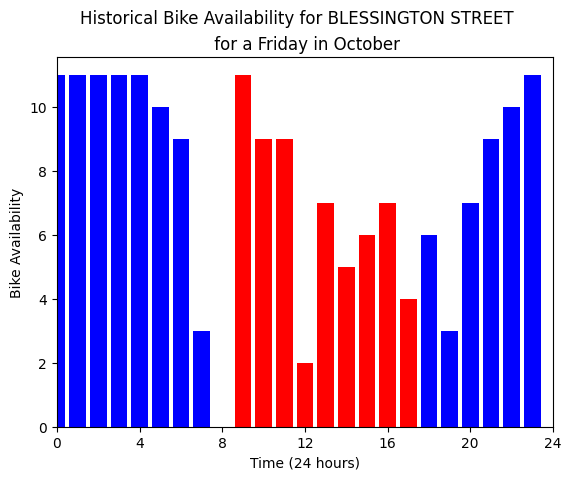

In [421]:


plt.ylabel("Bike Availability")
plt.xlabel("Time (24 hours)")
c=['blue','blue','blue','blue','blue','blue','blue','blue','red','red','red','red','red','red','red','red','red','red','blue','blue','blue','blue','blue','blue']
ytick = np.array([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26,28,30])
xtick = np.array([0, 4, 8, 12,16,20,24])
plt.xticks(xtick)
plt.yticks(ytick)
plt.xlim(0,24)
plt.bar(x,y,color=c)

plt.suptitle(f'Historical Bike Availability for {stationname}')
plt.title(f' for a {convert_day(day_num)} in {convert_month(month_num)}')
plt.show()

data2 =json.dumps(data1)
print(type(data2))
data6 = data2.replace("\'","\"")
print(data6)
#df2 = pd.read_json(data6,lines=True)

data3 = data2.replace("[","")
data3 = data3.replace("]","")
print(type(data3))
print(data3)

data4 = json.dumps(data3)
print(type(data4))
print(data4)
df= pd.read_json(data4)

with open('C:/Users/corma/comp30830/bike_data.txt','r') as f:
    data3 = json.load(f)
print(type(data3))
print(data3)